In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
choice = 1  #start from 0
devices = ['nfet_03v3', 'pfet_03v3']

# widths used for characterization
w = np.array([5.0, 5.0, 5.0, 5.0])

In [3]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
fet_name = par_names[1].split('[')[0]

# remove unwanted columns and rename for readability
df = df_raw.drop(['frequency', 'frequency.1'], axis=1)
df = df.apply(pd.to_numeric)
df.columns = df.columns.str.replace(fet_name, '')
df.columns = df.columns.str.replace(fet_name[1:], '')
df.columns = df.columns.str.replace('[dc]', '')
df.columns = df.columns.str.replace('onoise..', 'n')
df.columns = df.columns.str.removeprefix('@')
df.columns = df.columns.str.removeprefix('[')
df.columns = df.columns.str.removesuffix(']')
df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7256/3721318769.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')


,capbd,capbs,cdd,cgb,cgd,cgdo,cgg,cgs,cgso,css,...,gm,gmbs,id,l,vth,vb,vd,vg,n1overf,nid
0,4.061000e-15,4.061000e-15,1.275000e-17,-2.533000e-15,-1.146000e-17,7.949000e-16,2.543000e-15,1.138000e-18,7.949000e-16,-1.741000e-19,...,2.484000e-55,1.113000e-55,9.229000e-57,2.800000e-07,0.7416,0.0,0.000,0.000,9.595000e-61,7.691000e-17
1,3.848000e-15,3.848000e-15,5.024000e-18,-2.326000e-15,-4.589000e-18,7.949000e-16,2.331000e-15,-3.028000e-19,7.949000e-16,-8.904000e-20,...,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e-07,0.8040,-0.2,0.000,0.000,0.000000e+00,2.474000e-17
2,3.689000e-15,3.689000e-15,2.176000e-18,-2.162000e-15,-2.014000e-18,7.949000e-16,2.164000e-15,-5.893000e-19,7.949000e-16,-4.666000e-20,...,0.000000e+00,-2.003000e-33,0.000000e+00,2.800000e-07,0.8592,-0.4,0.000,0.000,0.000000e+00,8.981000e-18
3,4.031000e-15,4.061000e-15,1.861000e-18,-2.533000e-15,-1.550000e-18,7.909000e-16,2.542000e-15,-6.992000e-18,7.949000e-16,4.525000e-18,...,1.364000e-13,6.082000e-14,5.067000e-15,2.800000e-07,0.7413,0.0,0.025,0.000,1.059000e-18,6.723000e-17
4,3.826000e-15,3.848000e-15,7.296000e-19,-2.326000e-15,-6.155000e-19,7.909000e-16,2.330000e-15,-3.572000e-18,7.949000e-16,1.770000e-18,...,1.468000e-14,5.636000e-15,5.296000e-16,2.800000e-07,0.8037,-0.2,0.025,0.000,1.136000e-19,2.164000e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80899,2.938000e-15,3.848000e-15,-1.916000e-17,-9.845000e-16,3.528000e-17,7.041000e-16,4.937000e-15,-3.988000e-15,8.200000e-16,3.223000e-15,...,4.468000e-04,1.376000e-04,2.643000e-04,2.900000e-07,0.7826,-0.2,2.500,1.725,1.299000e-08,2.594000e-12
80900,2.905000e-15,3.689000e-15,-2.125000e-17,-9.616000e-16,4.026000e-17,7.041000e-16,4.909000e-15,-3.987000e-15,8.200000e-16,3.141000e-15,...,4.321000e-04,1.176000e-04,2.388000e-04,2.900000e-07,0.8365,-0.4,2.500,1.725,1.225000e-08,2.511000e-12
80901,2.968000e-15,4.061000e-15,-1.707000e-17,-1.009000e-15,3.025000e-17,7.029000e-16,4.970000e-15,-3.992000e-15,8.200000e-16,3.333000e-15,...,4.632000e-04,1.643000e-04,2.947000e-04,2.900000e-07,0.7212,0.0,2.525,1.725,1.389000e-08,2.688000e-12
80902,2.933000e-15,3.848000e-15,-1.917000e-17,-9.851000e-16,3.529000e-17,7.029000e-16,4.937000e-15,-3.988000e-15,8.200000e-16,3.223000e-15,...,4.473000e-04,1.377000e-04,2.646000e-04,2.900000e-07,0.7823,-0.2,2.525,1.725,1.302000e-08,2.595000e-12


In [4]:
# sweep variable vectors
l =   np.unique(df['l'])
vgs = np.unique(df['vg'])
vds = np.unique(df['vd'])
vsb = np.unique(-df['vb'])

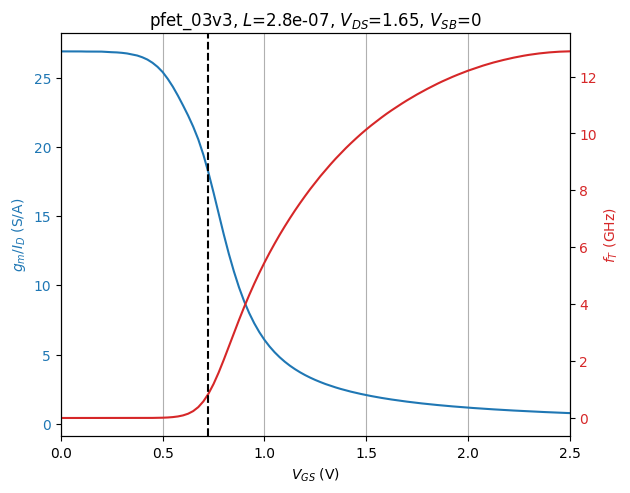

In [5]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=max(vds/2); VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['vd'] == VDS1)& (df['vb'] == -VSB1)]
gm_id1 = df1['gm'].values/df1['id'].values
cgg1 = df1['cgg'].values + df1['cgdo'].values + df1['cgso'].values
ft1 = df1['gm'].values/cgg1/2/np.pi

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 2.5)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_7256/835228120.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')


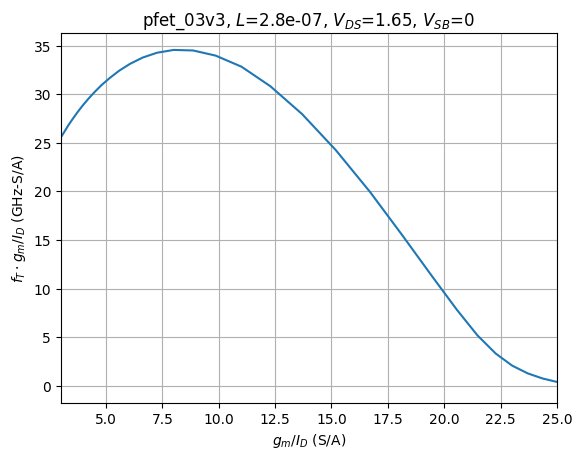

In [6]:
# plot product of gm/ID and fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

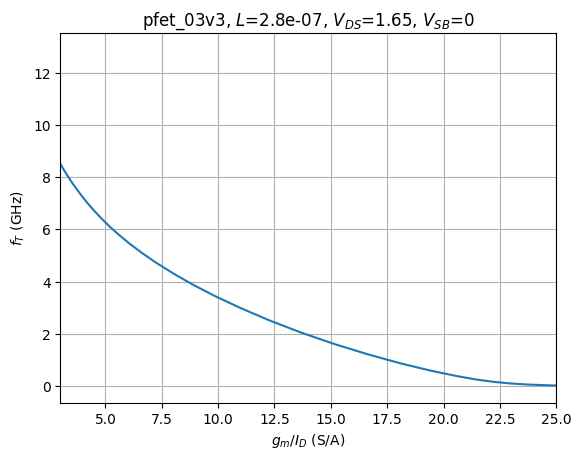

In [7]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

In [8]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
df2 = df.loc[ (df['vd'] == VDS2) & (df['vb'] == -VSB2)]
df2
gm_id2 = df2['gm'].values/df2['id'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
cgg2 = df2['cgg'].values + df2['cgdo'].values + df2['cgso'].values
ft2 = df2['gm'].values/cgg2/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

ValueError: cannot reshape array of size 203 into shape (133,newaxis)

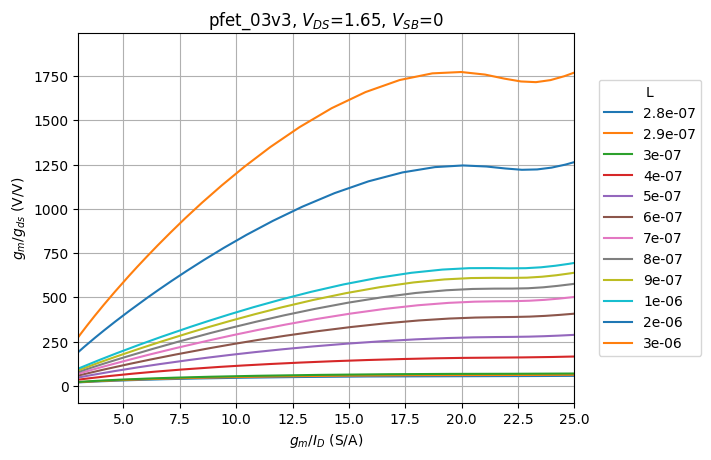

In [ ]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

In [9]:
# plot jd versus gm/ID for all L
jd2 = df2['id'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_7256/417937471.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
/tmp/ipykernel_7256/417937471.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')


NameError: name 'w' is not defined

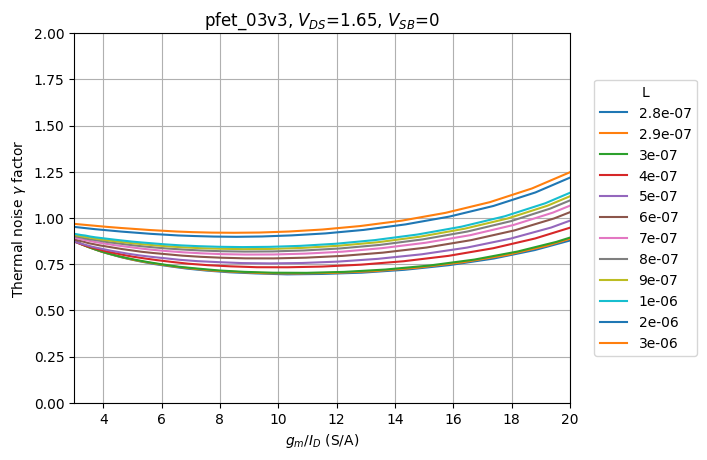

In [ ]:
# plot gamma versus gm/ID for all L
gamma = df2['nid'].values**2 / df2['gm'].values/4/300/1.38e-23
gamma = np.reshape(gamma, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gamma)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

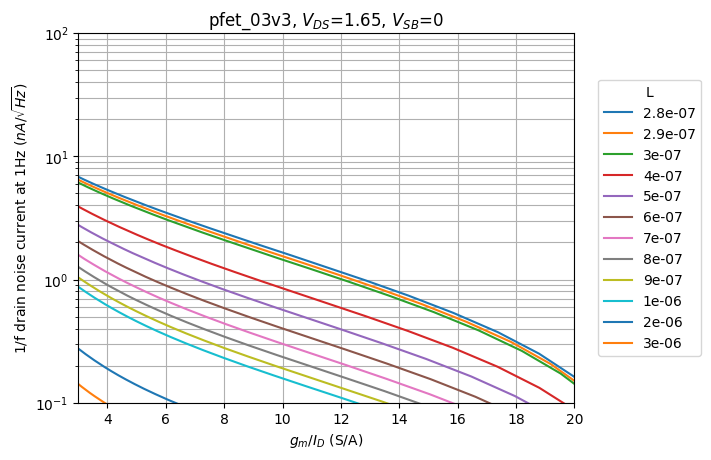

In [ ]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
n1overf = df2['n1overf'].values
n1overf = np.reshape(n1overf, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 100)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

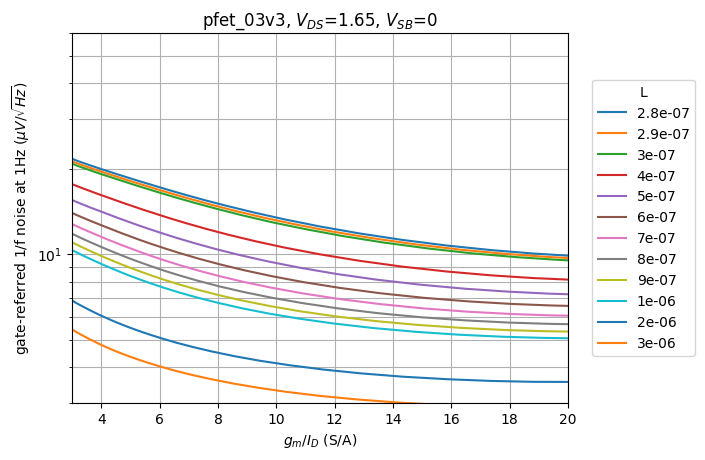

In [ ]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
n1overf_gate = df2['n1overf'].values / df2['gm'].values
n1overf_gate = np.reshape(n1overf_gate, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf_gate/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(3, 60)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()